## Importing Libraries

In [ ]:
!pip install pycaret
!pip install jinja2
!pip install markupsafe==2.0.1
!pip install shap

In [ ]:
# Import important libraries
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.core.arrays.categorical import contains
from pycaret.utils import version
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from scipy import stats

In [ ]:
from pycaret.regression import *
import jinja2
import re
%matplotlib inline
import io

## Custom Developed Functions 

In [ ]:
def Separate_cols(x):
  """the job is split the data into numeric functions to analyze"""
  numeric_data = train.select_dtypes(include=[np.number])
  return numeric_data

In [ ]:
def MisVal_Analysis_Plot(x):
    """generates graph of missing values by missing ratio"""
    if x.isnull().sum().sum() != 0:
      MV_x = x.isnull().sum() / len(x) * 100  
      MV_x = MV_x.drop(MV_x[MV_x == 0].index).sort_values(ascending=False)    
      missing_data = pd.DataFrame({'Missing Ratio %' :MV_x})
      missing_data.plot(kind = "barh")
      plt.title('Missing Values by Percentage Missing')
      plt.ylabel('Independent Variables')
      plt.xlabel('Percentage Missing')
      plt.show()
    else:
      print("No Missing values Found")

In [ ]:
def MisVal_Analysis_Table(x):
      """This function will generate with table of count of missing values in a column and percent missing"""
      if x.isnull().sum().sum() != 0:
        MV_x = x.isnull().sum() / len(x) * 100  
        MV_x = MV_x.drop(MV_x[MV_x == 0].index).sort_values(ascending=False)
        MV_xcount = x.isnull().sum()
        MV_xcount = MV_xcount.drop(MV_xcount[MV_xcount == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :MV_x})
        missing_data_count = pd.DataFrame({'Missing by Count' :MV_xcount})
        full_df = pd.concat((missing_data_count,missing_data), axis=1)
        print("Missing Value Analysis by Count & Percentage")
        print("\n")
        print("Total Rows available are: " + str(len(x)))
        print("\n")
      return full_df

In [ ]:
def missing_valuecol_names(x):
  """This function will generate the list of missing values dataframe's column names passed on a list"""
  if x.isnull().sum().sum() != 0:
        MV_x = x.isnull().sum() / len(x) * 100  
        MV_x = MV_x.drop(MV_x[MV_x == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :MV_x})
        df = list(missing_data.index)
  return df    

In [ ]:
def three_chart_plot(data, feature):
    """Histogram, qqplot and box plot for outliers"""
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(data.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = data[feature].mean(), c = 'red')
    plt.axvline(x = data[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(data.loc[:,feature], orient = 'v', ax = ax3 )
    
    return three_chart_plot


In [ ]:
def horizontal_plot(data, column_name, color, plot_title):
    """A function that plots a horizontal bar graph for the given column name """
    
    fig, ax = plt.subplots(figsize = (9, 6))
    title_cnt = data[column_name].value_counts().sort_values(ascending = False).reset_index()

    mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor = 'black', color =
                sns.color_palette(color, len(title_cnt)))

    for s in ['top','bottom','left','right']:
        ax.spines[s].set_visible(False)

    # Remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)

    # Add x,y gridlines
    ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

    # Show top values 
    ax.invert_yaxis()

    ax.set_title(plot_title,weight='bold',loc='center', pad=10, fontsize=16)
    
    ax.set_xlabel('Count', weight='bold')

    for i in ax.patches:
        ax.text(i.get_width() + 1.0, i.get_y() + 0.5, str(round((i.get_width()), 2)),
                fontsize=10, fontweight='bold', color='grey')

    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    plt.show()

### Load datasets

In [ ]:
# Importing Data to Google Colab
from google.colab import files
uploaded = files.upload()
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv
Saving train.csv to train.csv


## Droping columns

In [ ]:
train = train.drop('Id', axis = 1)
test = test.drop('Id', axis = 1)

#### Data Preparation Code:

In [ ]:
#separate the data into numerical and categorical
numeric_data = train.select_dtypes(include=[np.number])
categorical_data = train.select_dtypes(exclude=[np.number])

  ### Analyzing the numeric variables

##### Correlation matrix with target variable

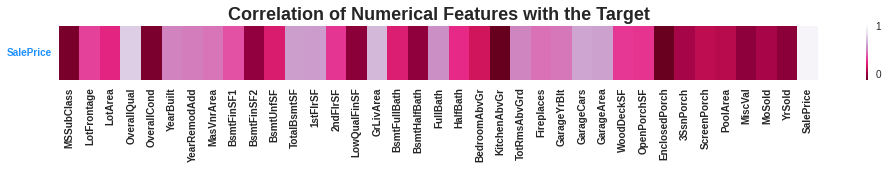

In [ ]:
num = numeric_data.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))

sns.heatmap(corr_num.sort_values(by = ['SalePrice'], ascending = False).head(1), cmap='PuRd_r')
plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [ ]:
correlation = numeric_data.corr()['SalePrice'].sort_values(ascending = False).to_frame().head(10)
cmap = sns.light_palette("cyan", as_cmap = True)
s = correlation.style.background_gradient(cmap = cmap)
s

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


#### **Sales Price** - Dependent variable

<function __main__.three_chart_plot(data, feature)>

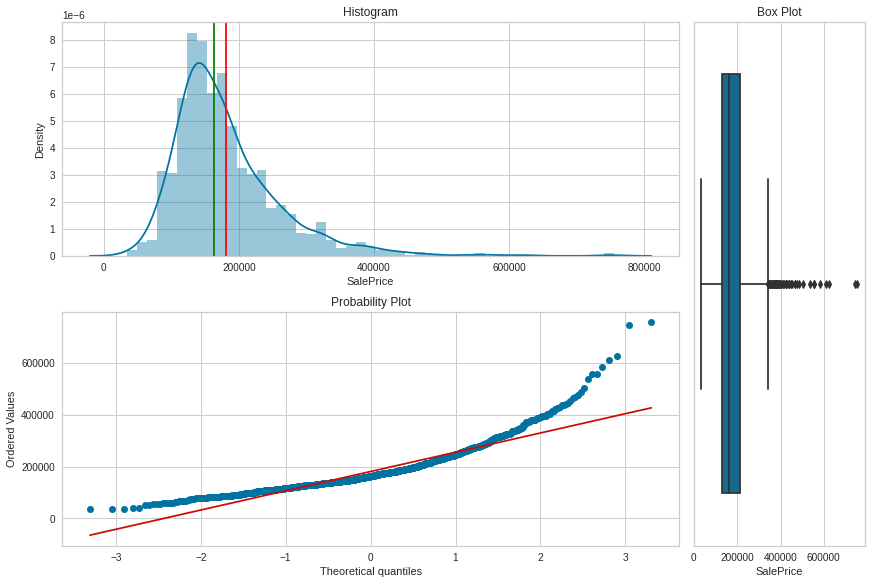

In [ ]:
three_chart_plot(numeric_data, 'SalePrice')

The right line represents mean in the histogram and the green line represents the median.

In [ ]:
train['SalePrice'].agg([np.mean, np.median])

mean      180921.19589
median    163000.00000
Name: SalePrice, dtype: float64

The Sale Price, the dependent variable is not normaly distributed.  It has right sknewness in the histogram.  The median price for homes sold was lower than mean price by $17,971.  The qqplots also shows that their is deviation on both ends.

#### **OverallQual** - independent variable

<function __main__.three_chart_plot(data, feature)>

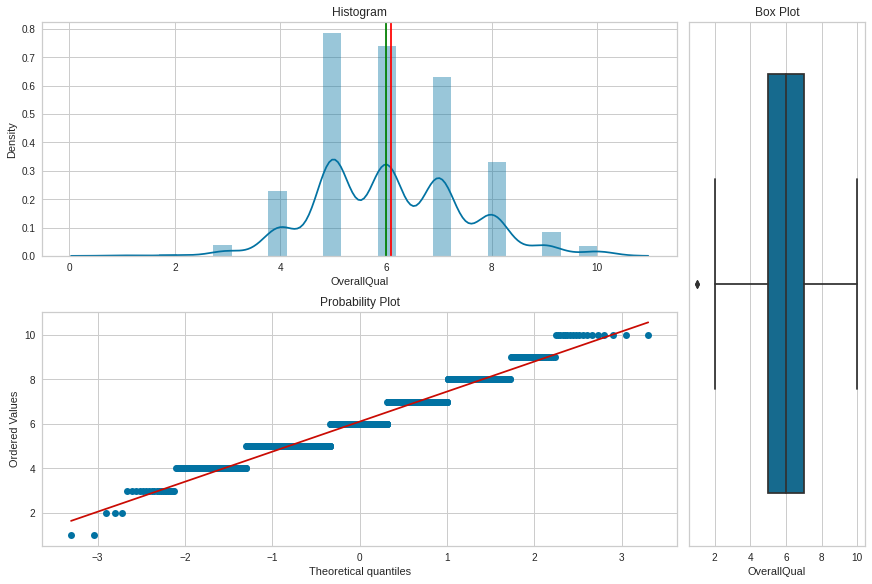

In [ ]:
three_chart_plot(numeric_data, 'OverallQual')

Overall category should be reclassified as categorical variable rather than numerical.

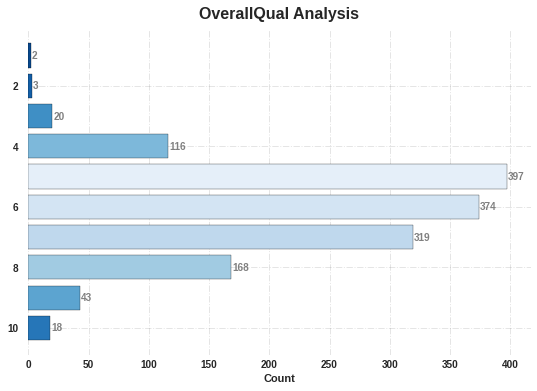

In [ ]:
horizontal_plot(numeric_data, 'OverallQual', "Blues", "OverallQual Analysis")

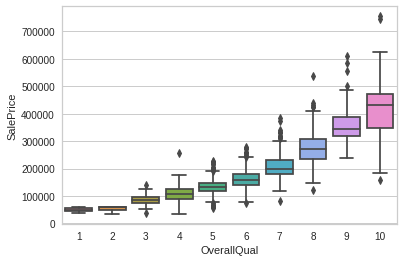

In [ ]:
sns.boxplot(x='OverallQual',y='SalePrice',data=numeric_data)
plt.show()

So we can see that as the Overall quality of the house increases so does the Sales Price.  Which is what we should expect higher quality homes are worth more.

### 3.1 Summary Statistics for Numerical Values

In [ ]:
print("Training Description")
print(train.describe())
print('\n')
print("Testing Desciption")
print(test.describe())

In [ ]:
numeric_data = train.select_dtypes(include=[np.number])
categorical_data = train.select_dtypes(exclude=[np.number])

### 3.1  Missing Value Check

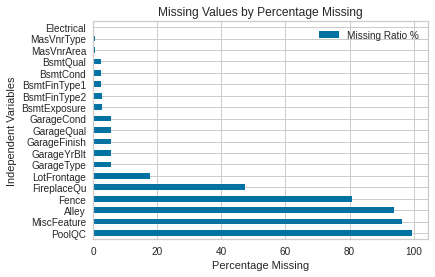

In [ ]:
MisVal_Analysis_Plot(train)

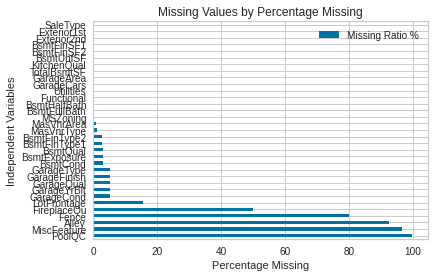

In [ ]:
MisVal_Analysis_Plot(test)

In [ ]:
print(MisVal_Analysis_Table(train))

Missing Value Analysis by Count & Percentage


Total Rows available are: 1460


              Missing by Count  Missing Ratio %
PoolQC                    1453        99.520548
MiscFeature               1406        96.301370
Alley                     1369        93.767123
Fence                     1179        80.753425
FireplaceQu                690        47.260274
LotFrontage                259        17.739726
GarageType                  81         5.547945
GarageYrBlt                 81         5.547945
GarageFinish                81         5.547945
GarageQual                  81         5.547945
GarageCond                  81         5.547945
BsmtExposure                38         2.602740
BsmtFinType2                38         2.602740
BsmtFinType1                37         2.534247
BsmtCond                    37         2.534247
BsmtQual                    37         2.534247
MasVnrArea                   8         0.547945
MasVnrType                   8         0.547945
Electric

In [ ]:
print(MisVal_Analysis_Table(test))

Missing Value Analysis by Count & Percentage


Total Rows available are: 1459


              Missing by Count  Missing Ratio %
PoolQC                    1456        99.794380
MiscFeature               1408        96.504455
Alley                     1352        92.666210
Fence                     1169        80.123372
FireplaceQu                730        50.034270
LotFrontage                227        15.558602
GarageCond                  78         5.346127
GarageYrBlt                 78         5.346127
GarageQual                  78         5.346127
GarageFinish                78         5.346127
GarageType                  76         5.209047
BsmtCond                    45         3.084304
BsmtExposure                44         3.015764
BsmtQual                    44         3.015764
BsmtFinType1                42         2.878684
BsmtFinType2                42         2.878684
MasVnrType                  16         1.096642
MasVnrArea                  15         1.028101
MSZoning

In [ ]:
df_trainMScol = missing_valuecol_names(train)
train_mis = train[df_trainMScol]

In [ ]:
print(train_mis.apply(lambda col: col.unique()))

PoolQC                                          [nan, Ex, Fa, Gd]
MiscFeature                         [nan, Shed, Gar2, Othr, TenC]
Alley                                           [nan, Grvl, Pave]
Fence                             [nan, MnPrv, GdWo, GdPrv, MnWw]
FireplaceQu                             [nan, TA, Gd, Fa, Ex, Po]
LotFrontage     [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...
GarageType      [Attchd, Detchd, BuiltIn, CarPort, nan, Basmen...
GarageYrBlt     [2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....
GarageFinish                                 [RFn, Unf, Fin, nan]
GarageQual                              [TA, Fa, Gd, nan, Ex, Po]
GarageCond                              [TA, Fa, nan, Gd, Po, Ex]
BsmtExposure                                [No, Gd, Mn, Av, nan]
BsmtFinType2                  [Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]
BsmtFinType1                  [GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]
BsmtCond                                    [TA, Gd, nan, Fa, Po]
BsmtQual  

AxesSubplot(0.125,0.125;0.62x0.755)


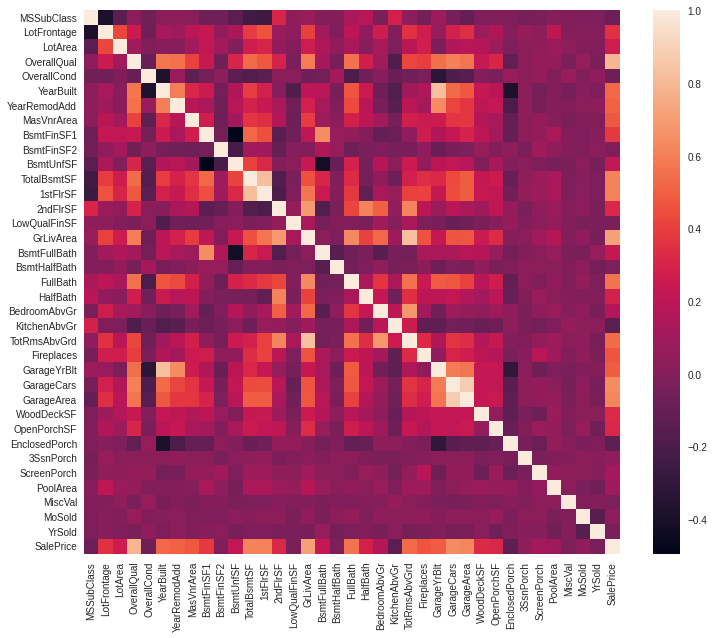

In [ ]:
f, ax = plt.subplots(figsize=(12, 10))
num_heatmap = sns.heatmap(numeric_data.corr())
print(num_heatmap)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [ ]:
df = numeric_data.dropna()

In [ ]:
# the independent variables set
X = df
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature           VIF
0      MSSubClass  4.971791e+00
1     LotFrontage  1.736994e+01
2         LotArea  3.489925e+00
3     OverallQual  8.389702e+01
4     OverallCond  5.031102e+01
5       YearBuilt  2.496220e+04
6    YearRemodAdd  2.454835e+04
7      MasVnrArea  1.973567e+00
8      BsmtFinSF1           inf
9      BsmtFinSF2           inf
10      BsmtUnfSF           inf
11    TotalBsmtSF           inf
12       1stFlrSF           inf
13       2ndFlrSF           inf
14   LowQualFinSF           inf
15      GrLivArea           inf
16   BsmtFullBath  3.677852e+00
17   BsmtHalfBath  1.215207e+00
18       FullBath  2.880735e+01
19       HalfBath  3.594465e+00
20   BedroomAbvGr  3.451432e+01
21   KitchenAbvGr  4.245122e+01
22   TotRmsAbvGrd  8.467821e+01
23     Fireplaces  3.039275e+00
24    GarageYrBlt  2.681653e+04
25     GarageCars  4.064952e+01
26     GarageArea  3.518325e+01
27     WoodDeckSF  1.953090e+00
28    OpenPorchSF  1.965901e+00
29  EnclosedPorch  1.486822e+00
30      

The missing values for some columns is at almost 100% which would mean that they do not provide value.  In the intial study we will use drop columns that high amounts of missing information and drop rows that have missing information for testing.